In [1]:
from quagmire import SurfaceProcessMesh
from quagmire import tools as meshtools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [38]:
import h5py

meshFile = h5py.File(name="ErosionModel1-v1-Mesh.h5", mode="r")
points = meshFile["dmplex"]["points"]
x = points.value[:,0]
y = points.value[:,1]

## don't need the bmask for visualisation

DM  = meshtools.create_DMPlex_from_points(x, y, np.zeros_like(x, dtype=np.bool))
SPM = SurfaceProcessMesh(DM)

 - Delaunay triangulation 0.757838s
 - cKDTree 0.011132s
 - Calculate node weights and area 0.621749s
 - Compute edge lengths 0.080106s
 - Construct nearest neighbour array 0.308817s
 - Find boundaries 0.013359s
 - Build smoothing matrix 0.018553s
 - Construct neighbour cloud array 0.181483s
 - Construct rbf weights 0.068471s


In [80]:
dataFile = h5py.File(name="ErosionModel1-v1-Data-1437.000000.h5", mode='r')
print dataFile.keys()

SPM.bmask = dataFile['bmask'].value.astype(np.bool)
height = dataFile['height'].value
deltah = dataFile['deltah'].value
upstream_area = dataFile['uparea'].value
erosion_deposition_rate = dataFile['erosion'].value

[u'bmask', u'deltah', u'erosion', u'height', u'uparea']


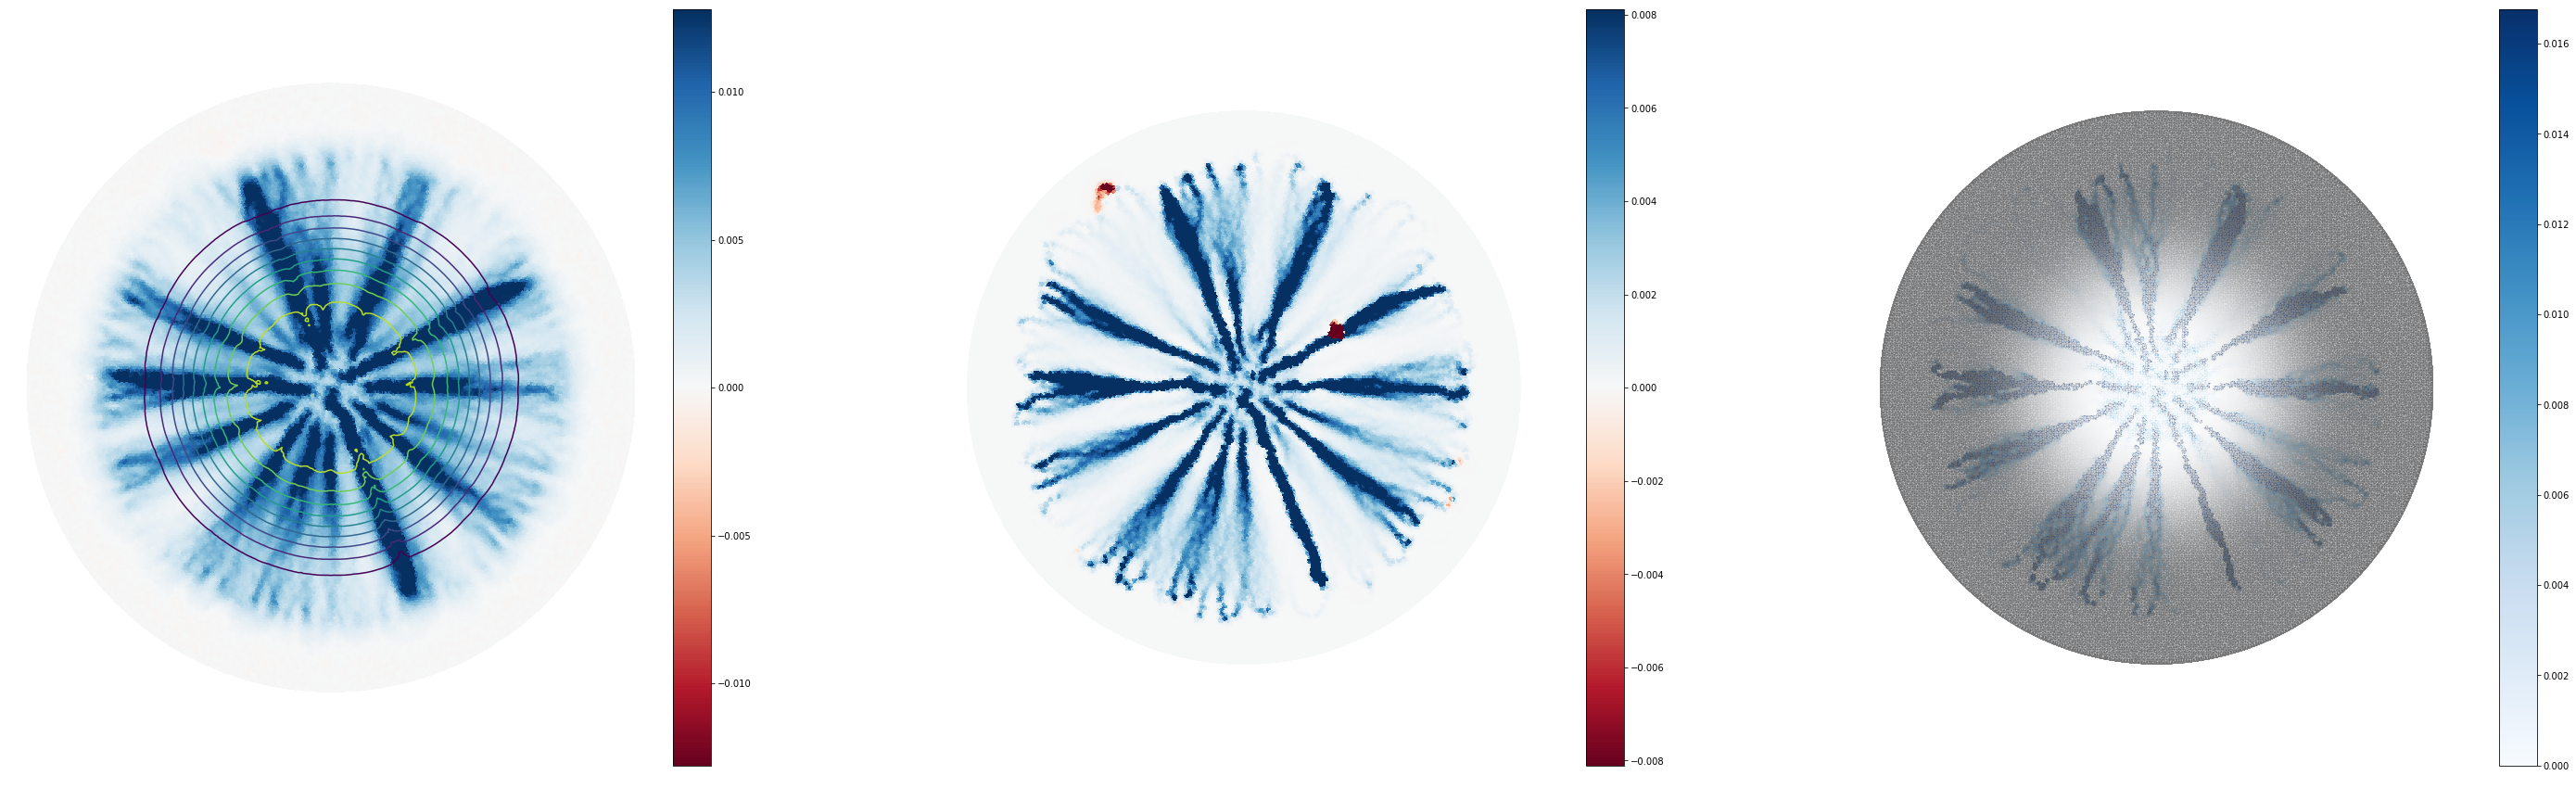

In [81]:
# Plot the stream power, erosion and deposition rates
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50,15))
for ax in [ax1, ax2, ax3]:
    ax.axis('equal')
    ax.axis('off')


dhmax = np.abs(deltah).mean() * 3.0
ermax = np.abs(erosion_deposition_rate).mean() * 3.0
    
im1 = ax1.tripcolor(x, y, SPM.tri.simplices, deltah, cmap=plt.cm.RdBu, vmin=-dhmax, vmax=dhmax)    
ax1.tricontour(x,y, SPM.tri.simplices, height, 10)

# im1 = ax1.tripcolor(x, y, sp.tri.simplices, sp.height, cmap=plt.cm.terrain)
im2 = ax2.tripcolor(x, y, SPM.tri.simplices, erosion_deposition_rate, cmap='RdBu', vmin=-ermax, vmax=ermax)

ax3.tripcolor(x, y, SPM.tri.simplices, height, cmap=plt.cm.gray, zorder=1, vmin=-0.75, alpha=0.5)
im3 = ax3.tripcolor(x, y, SPM.tri.simplices, upstream_area, cmap='Blues', vmax=upstream_area.mean()*3.0, zorder=0)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
plt.show()



In [79]:
ls -trl ErosionModel*h5

-rw-r--r--  1 lmoresi  staff  842632  3 May 17:07 ErosionModel1-v1-Data-1.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:09 ErosionModel1-v1-Data-0.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:11 ErosionModel1-v1-Data-68.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:13 ErosionModel1-v1-Data-163.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:14 ErosionModel1-v1-Data-239.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:15 ErosionModel1-v1-Data-306.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:17 ErosionModel1-v1-Data-373.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:18 ErosionModel1-v1-Data-450.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:33 ErosionModel1-v1-Data-500.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:35 ErosionModel1-v1-Data-591.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:36 ErosionModel1-v1-Data-687.000000.h5
-rw-r--r--  1 lmoresi  staff  842632  3 May 17:38 ErosionMo